In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.interpolate import griddata
import numpy as np
from scipy.interpolate import Rbf

In [2]:
coordinates_df = pd.read_csv("data/UW_coords.csv")
uw_coords = np.array([(coordinates_df["X"][i], coordinates_df["Y"][i]) for i in range(len(coordinates_df))])
len(uw_coords)

54

In [3]:
uw_vf = pd.read_csv("data/UW_VF_Data.csv")
pt_1 = np.array(uw_vf.iloc[0][22:76]).astype(int) #VF range
len(pt_1)

54

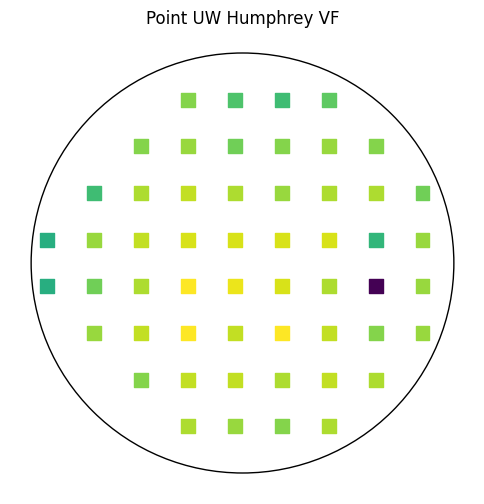

In [11]:
id_1 = np.array(uw_vf.iloc[0][22:76]).astype(int)
fig, ax = plt.subplots(figsize = (6,6))

ax.scatter(uw_coords[:,0], uw_coords[:,1], c= id_1, s=100, marker='s')
circle = mpatches.Circle((-2,0), 27, fill = False)
ax.add_patch(circle)
plt.axis('off')
plt.title("Point UW Humphrey VF")
plt.show()

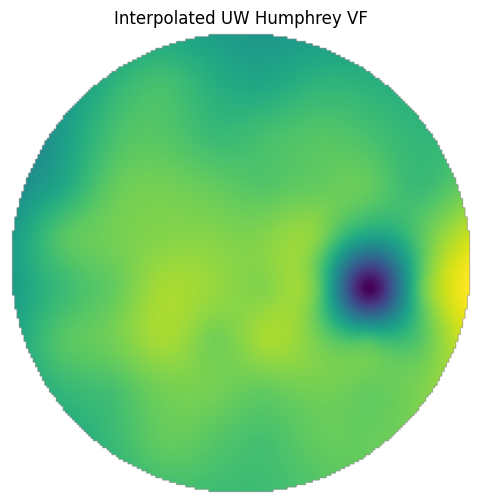

In [41]:
id_1 = np.array(uw_vf.iloc[0][22:76]).astype(int)


all_coords = np.vstack([uw_coords])
all_values = np.concatenate([id_1])

grid_x, grid_y = np.mgrid[-27:27:200j, -27:27:200j]
rbf = Rbf(all_coords[:,0], all_coords[:,1], all_values, function='thin_plate')
grid_z = rbf(grid_x, grid_y)

radius = 27
mask = np.sqrt(grid_x**2 + grid_y**2) <= radius
masked_grid = np.where(mask, grid_z, np.nan)

fig, ax = plt.subplots(figsize = (6,6))
ax.imshow(masked_grid.T, extent=(-27,27,-27,27), origin='lower', cmap='viridis')
#ax.scatter(uw_coords[:,0], uw_coords[:,1], c= id_1, s=100, marker='s')
plt.title("Interpolated UW Humphrey VF")
plt.axis('off')
plt.show()

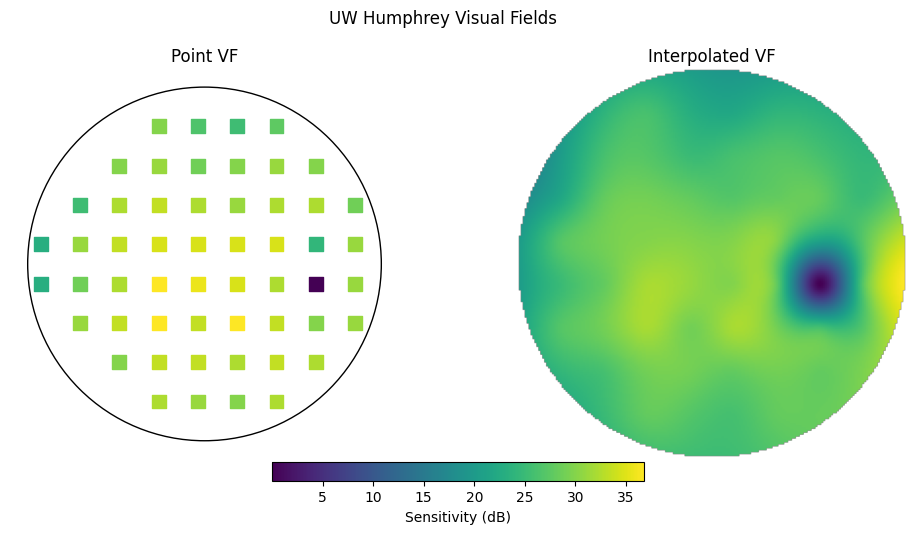

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))

ax[0].scatter(uw_coords[:,0], uw_coords[:,1], c= id_1, s=100, marker='s')
circle = mpatches.Circle((-2,0), 27, fill = False)
ax[0].add_patch(circle)
ax[0].set_title('Point VF')
ax[0].axis('off')

#--------------------------------

all_coords = np.vstack([uw_coords])

grid_x, grid_y = np.mgrid[-27:27:200j, -27:27:200j]
rbf = Rbf(all_coords[:,0], all_coords[:,1], id_1, function = 'thin_plate')
grid_z = rbf(grid_x, grid_y)

radius = 27
mask = np.sqrt(grid_x**2 + grid_y**2) <= radius
masked_grid = np.where(mask, grid_z, np.nan)

im = ax[1].imshow(masked_grid.T, extent=(-27,27,-27,27), origin = 'lower', cmap = 'viridis')
ax[1].set_title("Interpolated VF")
ax[1].axis('off')

fig.suptitle("UW Humphrey Visual Fields")

ax[0].set_aspect('equal')
ax[1].set_aspect('equal')
bar = fig.colorbar(im, orientation = 'horizontal', ax = ax, shrink = 0.4, pad = 0.008)
bar.set_label('Sensitivity (dB)')
plt.savefig('images/example_uw_visual_fields.png', bbox_inches = 'tight')